In [1]:
import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np
import seaborn as sns;
import sklearn;

In [3]:
df = pd.read_csv("C:\ML(Udimy)\Algerian_project\Edit_dataset.csv")
# print(df.iloc[20:30]);

In [4]:
## Creating Independent and Dependent Features

x = pd.concat([df.iloc[:, 0:9], df.iloc[:, 10:]], axis=1);
y = df['FWI'];

In [5]:
# Train Test Split

from sklearn.model_selection import train_test_split;

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42);

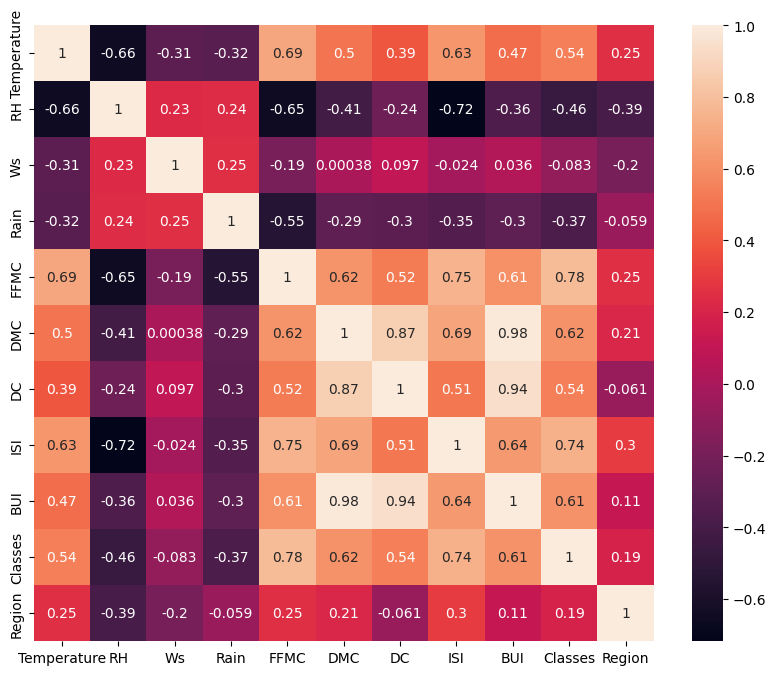

In [7]:
## Check for Multicollinearity

plt.figure(figsize=(10,8));
corr = x_train.corr();
sns.heatmap(corr,annot=True);

In [8]:

def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in   range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i];
                col_corr.add(colname);
    return col_corr;
    

In [10]:
## Threshold--Domain

result = correlation(x_train,.85);
# print(result);

In [11]:
# Drop the features when correlation is more than .85

x_train.drop(result,axis=1,inplace=True);
x_test.drop(result,axis=1,inplace=True);

In [12]:
# Standardization

from sklearn.preprocessing import StandardScaler;

# Note: In x train data we must use fit.transform and x test data we have to 
# use transforn 

scaler = StandardScaler();
x_train_scaled = scaler.fit_transform(x_train);
x_test_scaled = scaler.transform(x_test);

In [13]:
# Using performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error;

 # Finding r_square value

from sklearn.metrics import r2_score;

Mean absolutr error: 0.5642305340105715
Mean squared error: 0.6949198918152096
Root mean squared error: 0.8336185529456561
R2 score: 0.9842993364555512


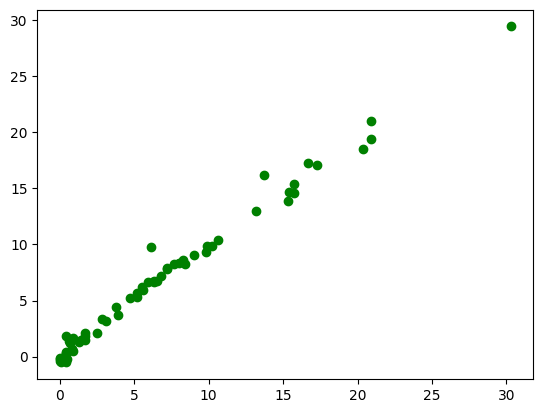

In [14]:
## Cross validation ridge Regression 

from sklearn.linear_model import RidgeCV;

# Creating ridgecv regression funtion:

regression_ridgecv = RidgeCV(cv=5);
regression_ridgecv.fit(x_train_scaled,y_train);

# Predicting the value:

y_predict = regression_ridgecv.predict(x_test_scaled);
# print(y_predict);

# Calculating the mae,mse,rmse values:

mae = mean_absolute_error(y_test,y_predict);
mse = mean_squared_error(y_test,y_predict);
rmse = np.sqrt(mse);
print("Mean absolutr error:",mae);
print("Mean squared error:",mse);
print("Root mean squared error:",rmse);

# Calculating R2 score value: 

score = r2_score(y_test,y_predict);
print("R2 score:",score);

# Scatter plot to check linear relation between t_test or y_predict:

plt.scatter(y_test,y_predict,color='green');
plt.show();